<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/Security_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KRIPTOGRAFI**

In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.2 MB/s eta 0:00:00


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

Upload gambar untuk enkripsi:


Saving aliandoo.jpg to aliandoo.jpg
Gambar asli:


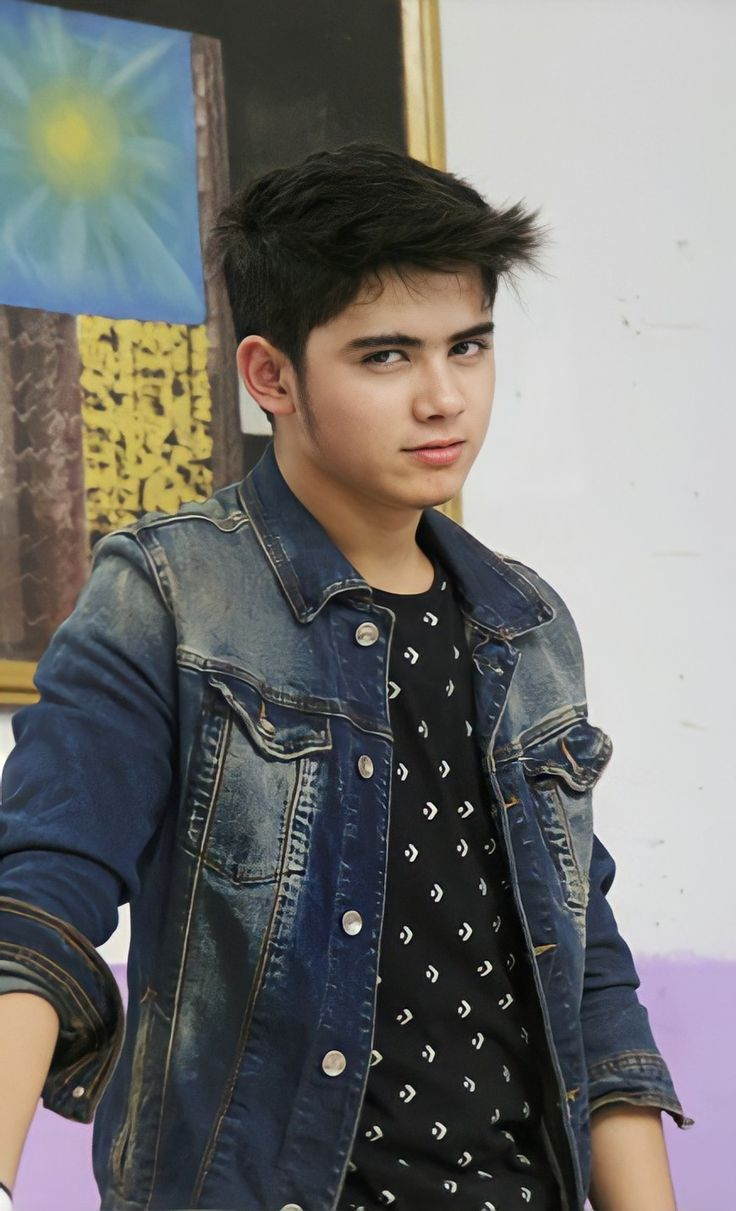

In [2]:
# Fungsi untuk mengenkripsi gambar menggunakan XOR
def xor_encrypt_decrypt(image, key):
    # Membuat kunci yang seukuran dengan gambar
    key_matrix = np.full(image.shape, key, dtype=np.uint8)
    # Menggunakan XOR untuk enkripsi/dekripsi
    encrypted_image = cv2.bitwise_xor(image, key_matrix)
    return encrypted_image

# Upload gambar untuk enkripsi
print("Upload gambar untuk enkripsi:")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]
image = cv2.imread(image_path)

# Tampilkan gambar asli
print("Gambar asli:")
cv2_imshow(image)

In [3]:
# Tentukan kunci enkripsi (bisa angka atau byte lain)
key = 123456  # Kunci enkripsi sederhana, bisa mengganti nilai ini

Gambar setelah dienkripsi:


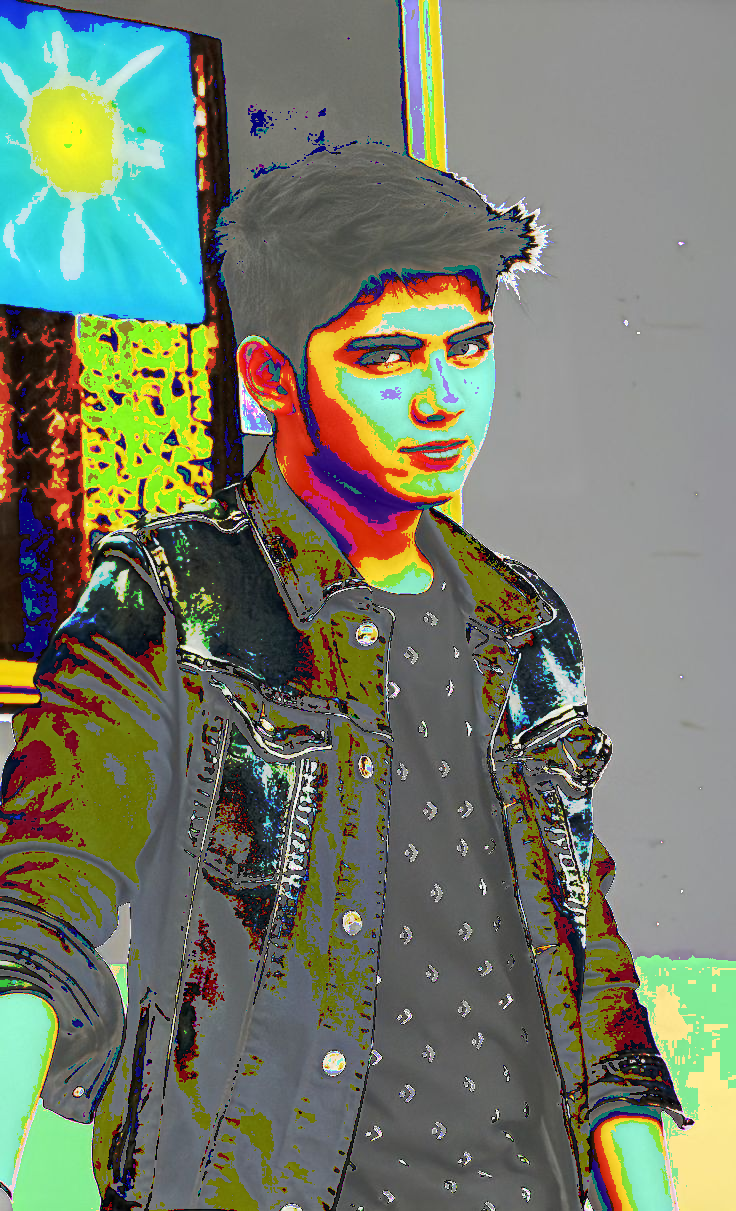

Gambar yang sudah dienkripsi disimpan sebagai encrypted_image.png


In [4]:
# Enkripsi gambar
encrypted_image = xor_encrypt_decrypt(image, key)

# Tampilkan gambar yang sudah dienkripsi
print("Gambar setelah dienkripsi:")
cv2_imshow(encrypted_image)

# Simpan gambar hasil enkripsi
encrypted_image_path = "encrypted_image.png"
cv2.imwrite(encrypted_image_path, encrypted_image)
print(f"Gambar yang sudah dienkripsi disimpan sebagai {encrypted_image_path}")

Gambar setelah didekripsi:


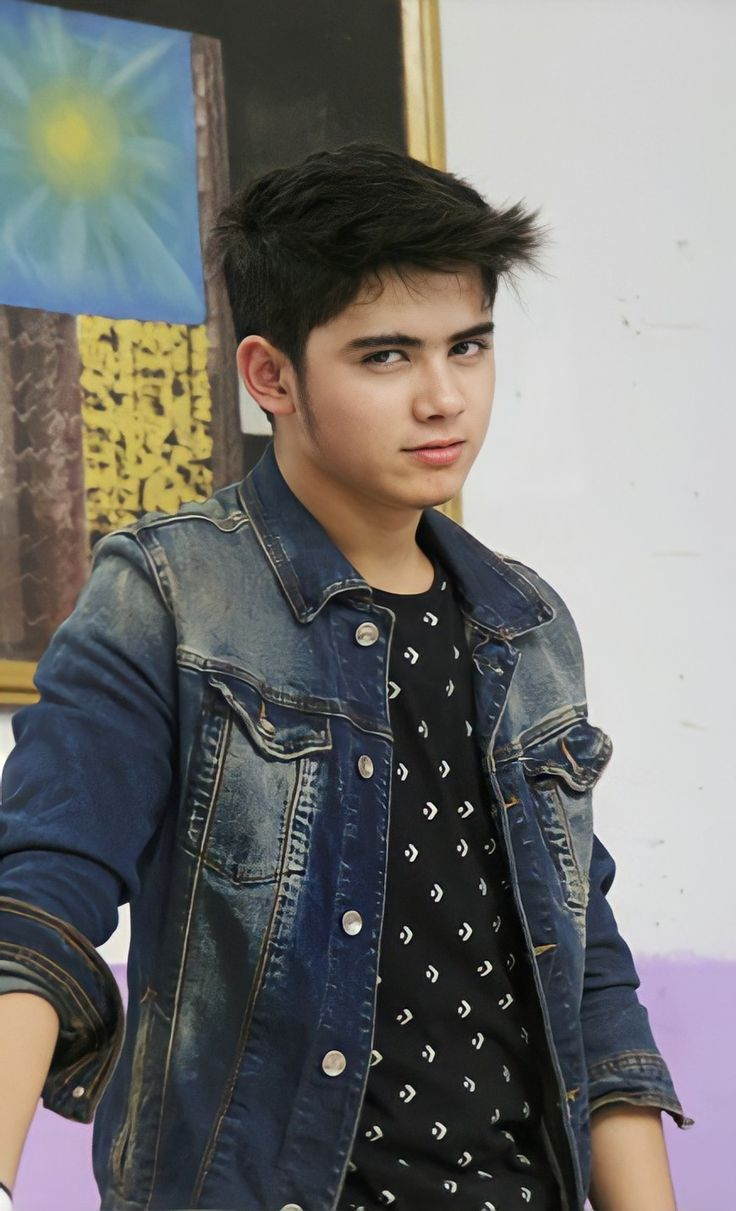

In [5]:
# Dekripsi gambar menggunakan kunci yang sama
decrypted_image = xor_encrypt_decrypt(encrypted_image, key)

# Tampilkan gambar hasil dekripsi (untuk memverifikasi)
print("Gambar setelah didekripsi:")
cv2_imshow(decrypted_image)


**STEGANOGRAFI**

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [7]:
# Fungsi untuk menyisipkan pesan (encoding)
def lsb_encode(cover_image, secret_message):
    # Konversi pesan menjadi bit
    message_bits = ''.join(format(ord(char), '08b') for char in secret_message) + '00000000'
    encoded_image = cover_image.copy()
    data_index = 0

    for row in encoded_image:
        for pixel in row:
            for channel in range(3):  # Iterasi tiap channel warna (B, G, R)
                if data_index < len(message_bits):
                    pixel[channel] = (pixel[channel] & ~1) | int(message_bits[data_index])
                    data_index += 1
                else:
                    break

    return encoded_image

In [8]:
# Fungsi untuk mengekstraksi pesan (decoding)
def lsb_decode(encoded_image):
    message_bits = []
    for row in encoded_image:
        for pixel in row:
            for channel in range(3):  # Iterasi tiap channel warna (B, G, R)
                message_bits.append(pixel[channel] & 1)

    # Mengonversi bit ke teks
    message_bytes = [message_bits[i:i + 8] for i in range(0, len(message_bits), 8)]
    secret_message = ''.join(chr(int(''.join(map(str, byte)), 2)) for byte in message_bytes)

    # Menghapus padding null karakter
    return secret_message.split('\x00', 1)[0]

Upload gambar cover:


Saving aliandoo.jpg to aliandoo (1).jpg
Gambar Cover:


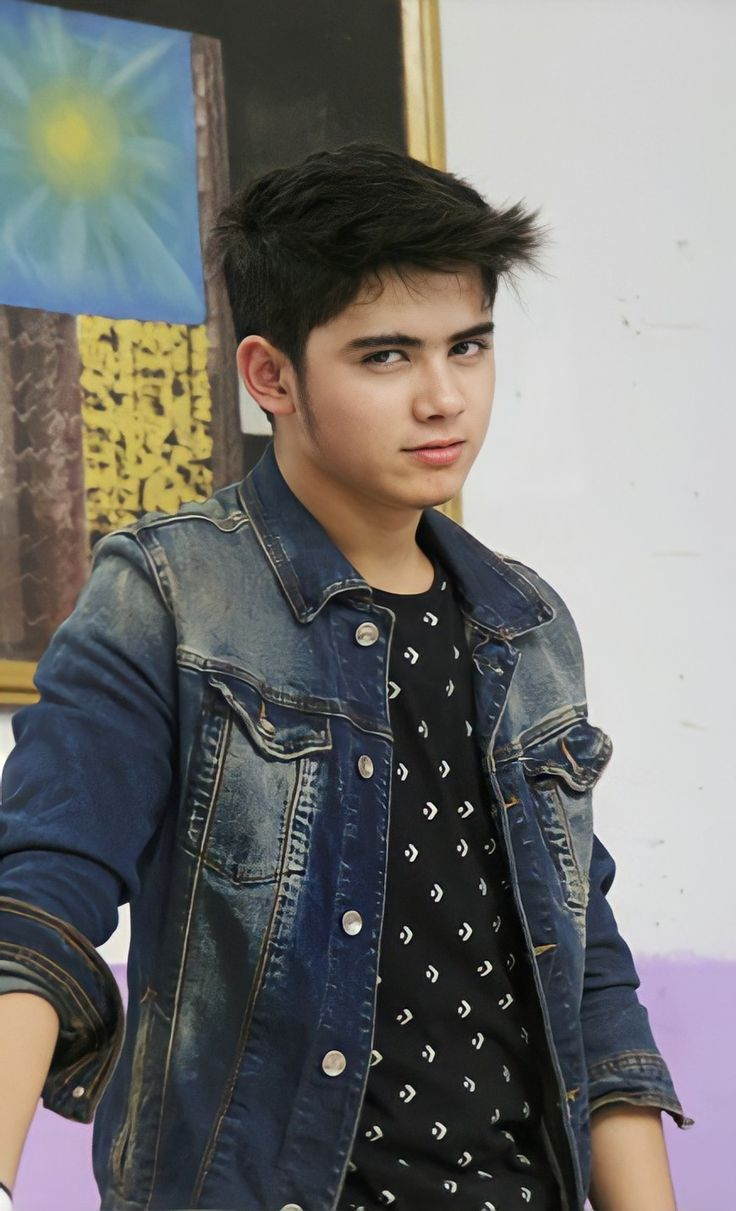

In [9]:
# Upload gambar cover
print("Upload gambar cover:")
uploaded_cover = files.upload()
cover_path = list(uploaded_cover.keys())[0]
cover_image = cv2.imread(cover_path)

# Tampilkan gambar cover
print("Gambar Cover:")
cv2_imshow(cover_image)

In [10]:
# Input pesan rahasia
secret_message = input("Masukkan pesan rahasia: ")

Masukkan pesan rahasia: bismillah jodoh


Proses encoding selesai!
Gambar dengan pesan rahasia:


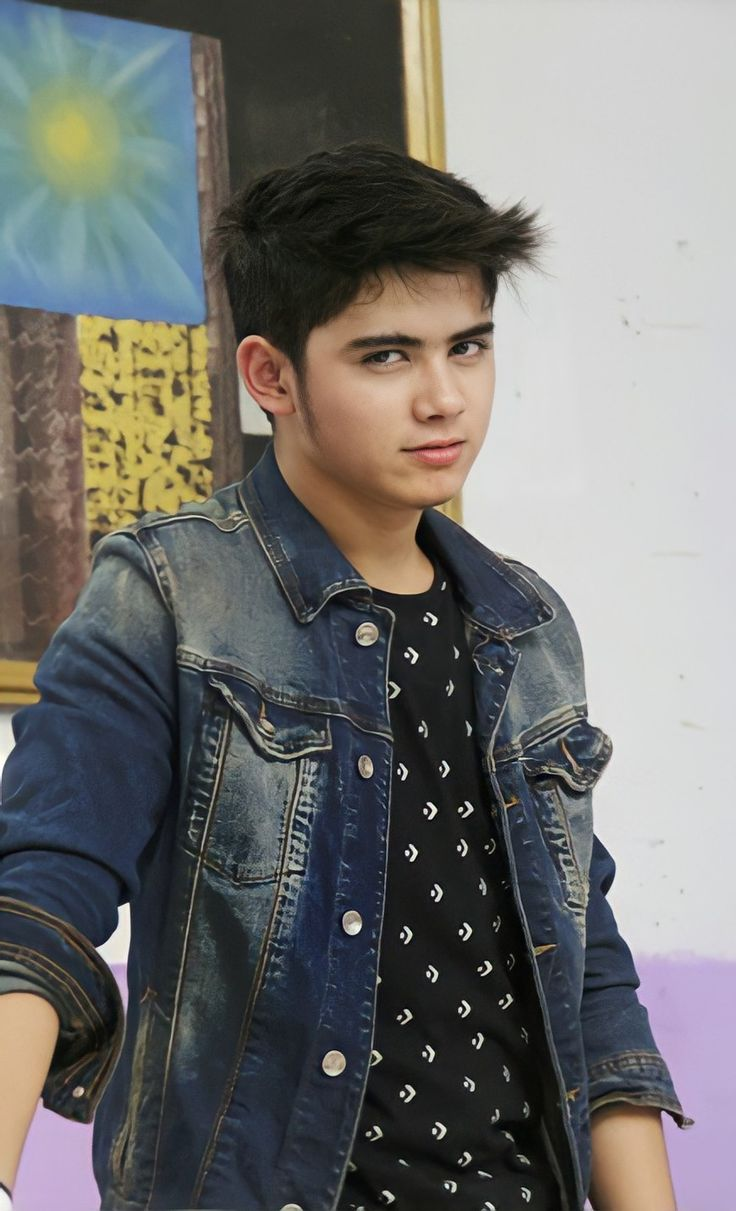

In [11]:
# Proses encoding
encoded_image = lsb_encode(cover_image, secret_message)
print("Proses encoding selesai!")
print("Gambar dengan pesan rahasia:")
cv2_imshow(encoded_image)

In [12]:
# Simpan gambar hasil encoding
encoded_path = "encoded_image.png"
cv2.imwrite(encoded_path, encoded_image)
print(f"Gambar hasil encoding disimpan sebagai {encoded_path}")

Gambar hasil encoding disimpan sebagai encoded_image.png


In [13]:
# Proses decoding
decoded_message = lsb_decode(encoded_image)
print(f"Pesan rahasia yang disisipkan: {decoded_message}")

Pesan rahasia yang disisipkan: bismillah jodoh


**DIGITAL** **WATERMARKING**

Saving aliandoo.jpg to aliandoo (5).jpg
Enter the watermark text: KAU TERINDAH BY ILLY


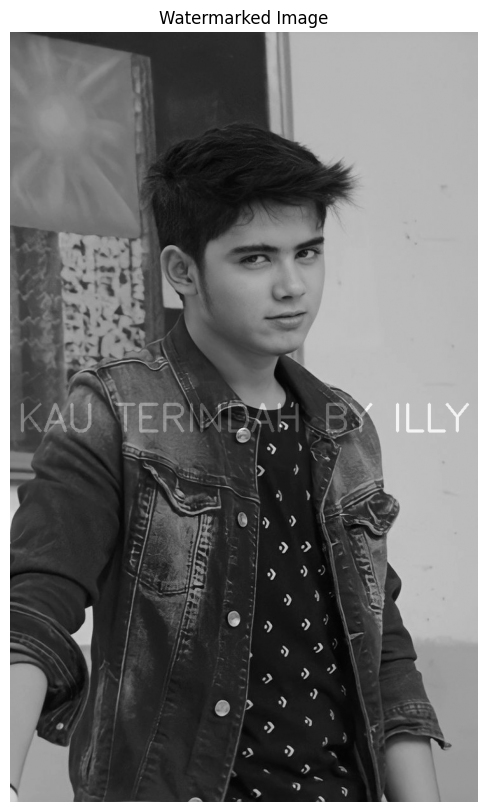

Watermarked image saved at: watermarked_image.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def embed_watermark_colab(image_path, watermark_text, output_path):
    # Step 1: Load the original image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found at the specified path.")

    # Step 2: Convert the image to grayscale (optional, for simplicity)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Create a blank watermark image
    watermark = np.zeros_like(gray_image)

    # Step 4: Add text to the watermark image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2
    thickness = 3
    text_size = cv2.getTextSize(watermark_text, font, font_scale, thickness)[0]
    text_x = (watermark.shape[1] - text_size[0]) // 2
    text_y = (watermark.shape[0] + text_size[1]) // 2

    cv2.putText(watermark, watermark_text, (text_x, text_y), font, font_scale, (255), thickness)

    # Step 5: Blend the watermark with the original image
    blended_image = cv2.addWeighted(gray_image, 0.8, watermark, 0.2, 0)

    # Step 6: Save the watermarked image
    cv2.imwrite(output_path, blended_image)

    # Display the watermarked image
    plt.figure(figsize=(10, 10))
    plt.imshow(blended_image, cmap='gray')
    plt.title('Watermarked Image')
    plt.axis('off')
    plt.show()

    print(f"Watermarked image saved at: {output_path}")

# Upload the image
uploaded = files.upload()

for filename in uploaded.keys():
    image_path = filename
    watermark_text = input("Enter the watermark text: ")
    output_path = "watermarked_image.jpg"

    # Embed the watermark
    embed_watermark_colab(image_path, watermark_text, output_path)

    # Download the watermarked image
    files.download(output_path)
